In [1]:
import json

with open('output/executions/36/simulations/cortex_1/1/bin_rates_B.json', 'r') as j:
     contents = json.loads(j.read())

In [3]:
times = list(map(int, list(contents.keys())))
values = list(contents.values())
values = [x for _, x in sorted(zip(times, values))]
times = sorted(times)

window_size = 10
i = window_size//2
ma = []

values = values+values+values+values
values = [0 for x in range(window_size//2)] + values + [0 for x in range(window_size//2)]

while i < (len(values) - window_size//2):
    
    window = values[(i - window_size//2) : (i + window_size//2)]
    window_average = round(sum(window) / window_size, 2)
    
    ma.append(window_average)
    
    i += 1

print(len(values))
print(len(ma))
  

2262
2252


9008
2252


ValueError: x and y must have same first dimension, but have shapes (9008,) and (2252,)

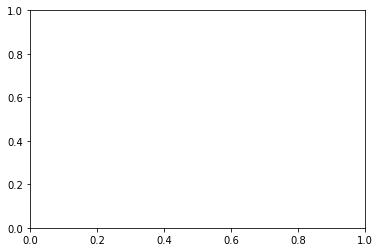

In [5]:
import matplotlib.pyplot as plt
times = times+[t+3000 for t in times]+[t+6000 for t in times]+[t+9000 for t in times]
print(len(times))
print(len(ma))
plt.plot(times, ma)

In [17]:
def divide_into_trials(seq, size):
    return [seq[int(pos):(int(pos) + int(size))] for pos in range(0, len(seq), int(size))]

In [27]:
values = [2,3,4,5,6,7,1,1,1,1,3,4,5,6]
threshold = 4
trial_time = 10
bin_size = 2
elements_for_trial = trial_time/bin_size
values_into_trials = divide_into_trials(values, elements_for_trial)
response_times = []
print(values_into_trials)
for values_index, trial_values in enumerate(values_into_trials):
    time_ids = [time_id for time_id, value in enumerate(trial_values) if value >= threshold]
    if len(time_ids):
        first_time_id = time_ids[0]
        print(first_time_id)
        actual_time = (values_index*trial_time)+(first_time_id*bin_size)
        response_times.append(actual_time)
print(response_times)

[[2, 3, 4, 5, 6], [7, 1, 1, 1, 1], [3, 4, 5, 6]]
2
0
1
[4, 10, 22]


AUDITORY [80, 70, 85, 120, 80, 70, 90, 95, 85, 95, 105, 95, 110, 115, 110, 80, 85, 70, 115, 110, 125, 115, 115, 120, 85, 285, 250, 270, 340, 275, 365, 295, 295, 300, 355, 360, 300, 340, 260, 285, 365, 265, 260, 300, 330, 270, 300, 270, 270, 290]
VISUAL:  [300, 355, 325, 295, 325, 365, 360, 365, 325, 355, 355, 340, 275, 325, 355, 325, 355, 355, 370, 355, 365, 355, 290, 355, 325, 290, 325, 385, 335, 270, 295, 335, 305, 295, 335, 335, 335, 295, 265, 335, 305, 270, 335, 335, 350, 340, 435, 405, 305, 335]
FINAL:  [ 80  70  85 120  80  70  90  95  85  95 105  95 110 115 110  80  85  70
 115 110 125 115 115 120  85 285 250 270 335 270 295 295 295 295 335 335
 300 295 260 285 305 265 260 300 330 270 300 270 270 290]


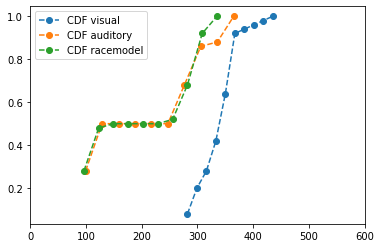

In [10]:
from src.nest.plots.generate import moving_average_plot
from src.nest.output.rates import calculate_response_times
import json

# 68 is AUDITORY for 100 times
# 91 is VISUAL for 100 times
# 93 is BOTH, MERGED for 100 times
# 100 is BOTH, DIFFERENT CORTEXES for 50 times
exec = 'cortex_2/2'
with open('output/executions/100/simulations/'+exec+'/bin_rates_A_complete.json', 'r') as j:
    bin_rates_A_complete = json.loads(j.read())
with open('output/executions/100/simulations/'+exec+'/bin_rates_B_complete.json', 'r') as j:
    bin_rates_B_complete = json.loads(j.read())

ma_rates_A = moving_average_plot(bin_rates_A_complete, 'plots/', 'ma_rates_A')
ma_rates_B = moving_average_plot(bin_rates_B_complete, 'plots/', 'ma_rates_B')

trial_time = 3000
bin_size = 5

th = 15
response_times = []
response_times_A = calculate_response_times(ma_rates_A, th, trial_time, bin_size)
for rt in response_times_A:
    response_times.append(rt%1000)

response_times_B = calculate_response_times(ma_rates_B, th, trial_time, bin_size)
for rt in response_times_B:
    response_times.append(rt%1000)

print('AUDITORY', response_times)

response_times_auditory = response_times

exec = 'cortex_1/1'
with open('output/executions/100/simulations/'+exec+'/bin_rates_A_complete.json', 'r') as j:
    bin_rates_A_complete = json.loads(j.read())
with open('output/executions/100/simulations/'+exec+'/bin_rates_B_complete.json', 'r') as j:
    bin_rates_B_complete = json.loads(j.read())

ma_rates_A = moving_average_plot(bin_rates_A_complete, 'plots/', 'ma_rates_A')
ma_rates_B = moving_average_plot(bin_rates_B_complete, 'plots/', 'ma_rates_B')

trial_time = 3000
bin_size = 5

th = 15
response_times = []
response_times_A = calculate_response_times(ma_rates_A, th, trial_time, bin_size)
for rt in response_times_A:
    response_times.append(rt%1000)

response_times_B = calculate_response_times(ma_rates_B, th, trial_time, bin_size)
for rt in response_times_B:
    response_times.append(rt%1000)

print('VISUAL: ', response_times)

response_times_visual = response_times



# CDF plot for spike times
import numpy as np
import matplotlib.pyplot as plt

race_model = np.minimum.reduce([response_times_visual, response_times_auditory])

print('FINAL: ', race_model)

def cdf_calc(data):
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    return bins_count, cdf

bins_count_visual, cdf_visual = cdf_calc(response_times_visual)
bins_count_auditory, cdf_auditory = cdf_calc(response_times_auditory)
bins_count_racemodel, cdf_racemodel = cdf_calc(race_model)
  
plt.xlim(0, 600)
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count_visual[1:], cdf_visual, '--o', label="CDF visual")
plt.plot(bins_count_auditory[1:], cdf_auditory, '--o', label="CDF auditory")
plt.plot(bins_count_racemodel[1:], cdf_racemodel, '--o', label="CDF racemodel")
plt.legend()
plt.show()